## Load and explore Data

### Q1. Import the required libraries and read the dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [ ]:
## to view all the columns in the 
pd.set_option("display.max_columns", None)

### Q2. Check the first few samples, shape, info of the data and try to familiarize 
yourself with different features.

In [ ]:
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
## loading the variable information csv file.
data_info = pd.read_csv('fifa_ variable_information.csv')
data_info.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


### Q3. Drop the columns which you think redundant for the analysis 

In [ ]:
df[['Photo','Flag','Club Logo','Body Type','Jersey Number']].head(2)

,Photo,Flag,Club Logo,Body Type,Jersey Number
0,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/teams/2/light/241.png,Messi,10.0
1,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/teams/2/light/45.png,C. Ronaldo,7.0


In [ ]:
## dropping the above five categorical columns, which are redundant for our analysis.
df.drop(['Photo','Flag','Club Logo','Body Type','Jersey Number'],axis=1,inplace=True)

In [ ]:
df.shape

(18207, 55)

## Data Preprocessing

### Q4. Convert the column "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix.

- **Note:** When the record/entry has "M"(indicates millions) as suffix you need to multiply that value with 1000000
- When the record/entry has "K"(indicates thousands) as suffix you need to multiply that value with 1000

In [ ]:
## Just checking some samples.
df[['Value','Wage','Release Clause']].sample(4)

,Value,Wage,Release Clause
17003,€170K,€1K,€404K
7523,€1.1M,€8K,€2.2M
7027,€825K,€2K,€1.2M
16862,€120K,€2K,€219K


In [ ]:
## Writing a function to clean the data of columns "Value" and "Wage"
def convert(entry):
    
    if entry==np.nan:
        new_entry=float(0)
    else:
        entry=entry.replace('€','')
        if entry[-1]=='K':
            new_entry=float(entry.replace('K',''))*1000
        else:
            new_entry=float(entry.replace('M',''))*1000000
    return new_entry

In [ ]:
## applying the above function to column 'Value'
df['Value']= df['Value'].apply(lambda x : convert(x))

## applying the above function to column 'Wage'
df['Wage'] = df['Wage'].apply(lambda x: convert(x))

## applying the above function to column 'Release Clause' 
df['Release Clause'] = df['Release Clause'].fillna('0').apply(lambda x: convert(x))

In [ ]:
## Just checking some samples after cleaning the data.
df[['Value','Wage','Release Clause']].sample(4)

,Value,Wage,Release Clause
2837,5500000.0,14000.0,8800000.0
17009,70000.0,1000.0,95000.0
1897,6500000.0,15000.0,13000000.0
15022,140000.0,1000.0,203000.0


### Q5. Convert the column "Joined" into integer datatype with keeping only the year.

In [ ]:
## just checking some samples
df['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [ ]:
## Keeping only year from the column 'Joined'
## Filling null by 0 and converting it to integer
df['Joined'] = df['Joined'].str.split().str.get(2).fillna(0).astype(int)

In [ ]:
## just check some samples after cleaning.
df['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int32

### Q6. Convert the column "Contract Valid Until" to pandas datetime type.

In [ ]:
## checking the unique entries
df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [ ]:
## converting into pandas datetime format.
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [ ]:
## checking the data after conversion.
df['Contract Valid Until'].sample(5)

13547   2019-01-01
15112   2022-01-01
16461   2022-01-01
10280   2019-01-01
9748    2021-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

### Q7. The column 'Height' is in inches with a quotation, Convert to float with decimal points.

In [ ]:
df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [ ]:
## writing a function
def height_convert(x):
    if x is not None:
        return float(str(x).replace("'",'.'))

In [ ]:
## applying a function
df['Height'] = df['Height'].apply(height_convert)

In [ ]:
df['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

### Q8. The column "Weight" has suffix as lbs, remove the suffix and convert to float.

In [ ]:
df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [ ]:
df['Weight'] = df['Weight'].fillna('0').apply(lambda x: x.replace('lbs','')).astype(float)

In [ ]:
df['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

### Q9. Check for percentage of missing values and impute them with appropriate imputation techniques.

In [ ]:
df.isnull().sum()/len(df)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Position                     0.329544
Joined                       0.000000
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.000000
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling                    0.263635
Curve       

In [ ]:
## The column 'Loaned_from' has 93% of missing values, we will drop that column
df.drop('Loaned From',axis=1,inplace=True)

In [ ]:
missing_values = df.isnull().sum()/len(df)

## These are the index of both categorical columns as well as numerical columns having null values.
index = [i  for i in missing_values[missing_values>0].index]

## separating numerical columns and categorical columns
numerical_columns = [i     for i in index      if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i     for i in index      if i in df.columns and  df[i].dtype==object]

## Filling the null values of the numerical columns with median computation.
for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())
    
## Filling the null values of the categorical columns with mode computation.
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])

In [ ]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance   

## EDA

### Q10. Plot the distribution of Overall rating for all the players and write your findings.

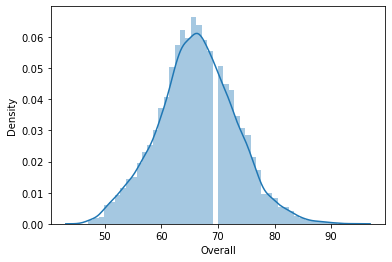

In [ ]:
sns.distplot(df['Overall'])
plt.show()

- As we can observe from the above distribution plot, the overall rating ranges from around 45-95.
- There are more number of players whose overall ratings is between 60-70.

### Q11. Retrieve the names of top20 players based on the Overall rating.

In [ ]:
top20_players = df.groupby('Name')['Overall'].max().sort_values(ascending=False).head(20)
top20_players

Name
Cristiano Ronaldo    94
L. Messi             94
Neymar Jr            92
Sergio Ramos         91
E. Hazard            91
De Gea               91
L. Suárez            91
L. Modrić            91
K. De Bruyne         91
D. Godín             90
David Silva          90
T. Kroos             90
J. Oblak             90
R. Lewandowski       90
H. Kane              89
T. Courtois          89
S. Agüero            89
M. ter Stegen        89
Sergio Busquets      89
E. Cavani            89
Name: Overall, dtype: int64

### Q12. Generate a dataframe which should include all the information of the Top20 players based on the Overall rating.

In [ ]:
Top20_df = df[ (df['Name'].isin(top20_players.index)) & (df['Overall'].isin(top20_players.values)) ]
Top20_df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,2004,2021-01-01,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022-01-01,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,2017,2022-01-01,5.90,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020-01-01,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,2015,2023-01-01,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


### Q13. What is the average "Age" and "Wage" of these top20 players? (use the dataframe created in the question 11)

In [ ]:
Top20_df[['Age','Wage']].mean()

Age         28.9
Wage    301700.0
dtype: float64

- The average age of the top20 players in around 30.
- The average wages given to the top20 players is around € 301700.0.

### Q14. Among the top20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [ ]:
Top20_df[Top20_df['Wage']==Top20_df['Wage'].max()][['Name','Wage']]

,Name,Wage
0,L. Messi,565000.0


### Q15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'. 
- i) find the average Overall rating for each club.
- ii) Display the average overall rating of Top10 Clubs using a plot

In [ ]:
## creating a dataframe
df_14 = df[['Name','Club','Wage','Overall']]
df_14.head(2)

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94


In [ ]:
## Finding the average overall rating for each club
df_14.groupby('Club')['Overall'].mean()

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64

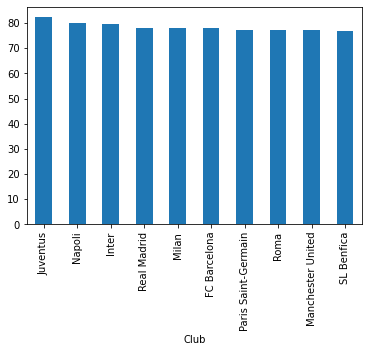

In [ ]:
## Displaying the average overall rating of Top10 Clubs using a bar plot
df_14.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

### Q16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same.

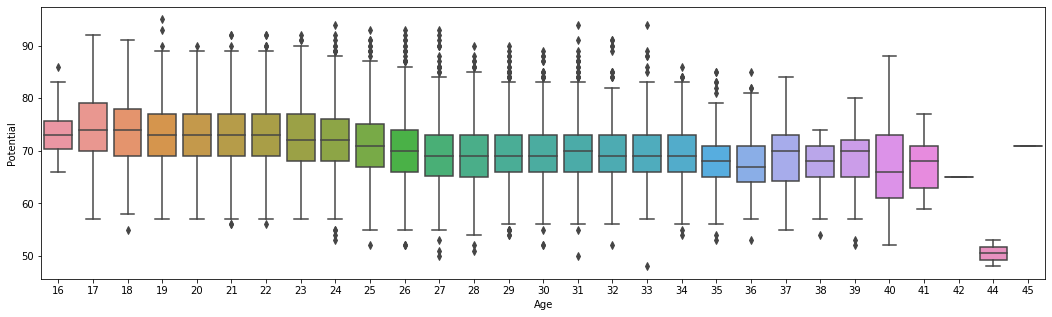

In [ ]:
plt.figure(figsize=(18,5))
sns.boxplot(df['Age'],df['Potential'])
plt.show()

- We can observe that the Age is inversely proportional to the Potential of the player.
- A player shows average peak potential at the age of 17 and the maximum potential at the age of 19 which can be seen as an outlier in the boxplot.
- After that it decreases and remain almost the same till the age of 34. There are also a lot of outliers which indicates that despite being of higher ager, the player shows higher potential which is an exception for some cases.

### Q17. Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (2 points) (hint: use potential, Overall, value, international reputation, and Release Clause)

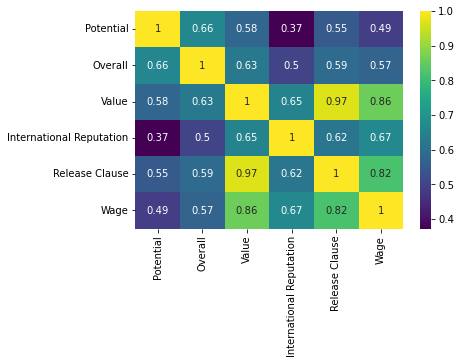

In [ ]:
imp_features = df[['Potential','Overall','Value','International Reputation','Release Clause','Wage', ]]

sns.heatmap(imp_features.corr(),annot=True,cmap='viridis')
plt.show()

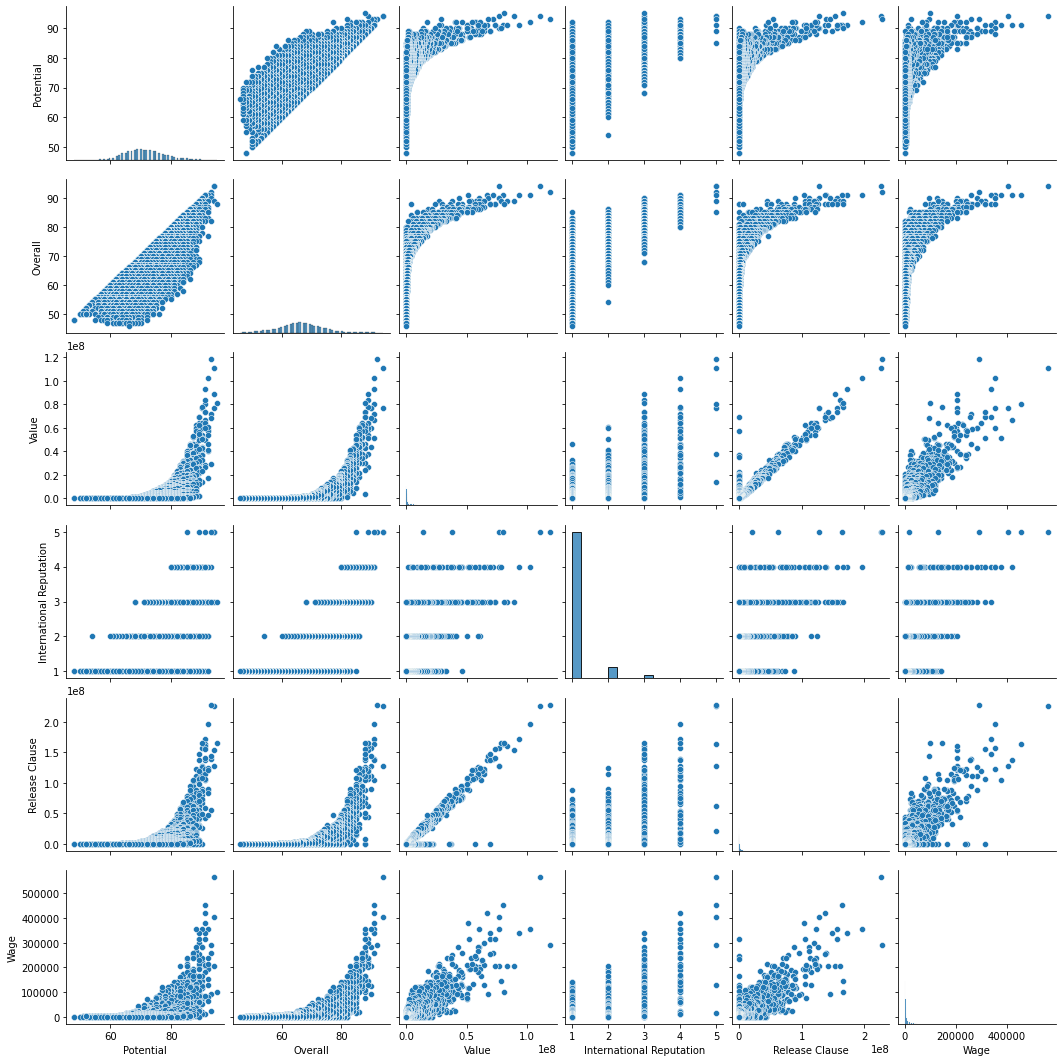

In [ ]:
sns.pairplot(imp_features)
plt.show()

- As we can observe from the above heatmap and a pairplot,
- The Wage column has high positive correlation with the columns potential, Overall, Value, International reputation, and Release Clause.
- And from the pairplot we can see that when the potentional, overall, value, international reputation, and Release cause  increases there is a significant increase in the wages of the players.

### Q18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot. 

In [ ]:
df['Position'].value_counts().sort_values(ascending=False).head(1)

ST    2212
Name: Position, dtype: int64

In [ ]:
df['Position'].value_counts().sort_values(ascending=True).head(1)

LF    15
Name: Position, dtype: int64

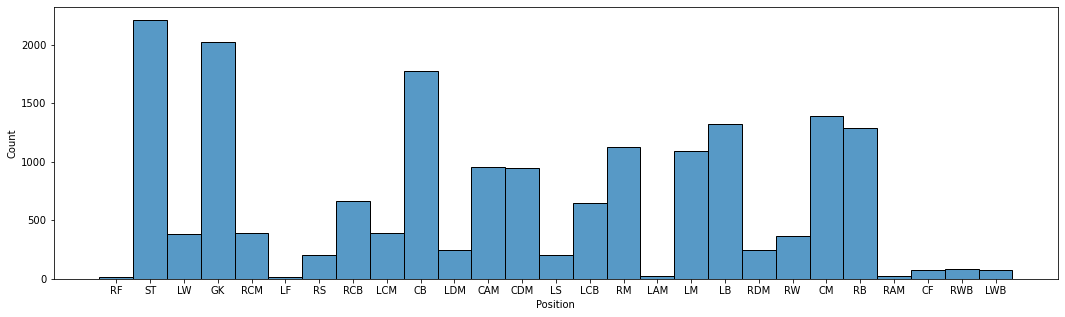

In [ ]:
plt.figure(figsize=(18,5))
sns.histplot(df['Position'])
plt.show()

- The maximum numner of players play in the position 'ST' (striker), around 2000 players.
- The mimimum number of players play in the position 'LF' (Left Forward), around 15 players.

### Q19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [ ]:
df[(df['Club']=='Juventus') & (df['Wage']>200000)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022-01-01,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,3.0,3.0,4.0,High/ Medium,LF,2015,2022-01-01,5.1,165.0,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,2020-01-01,6.2,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


- There are 3 players from the club 'Juventus' and whose wage is greater than 200K.

### Q20. Generate a dataframe containing  top 5 players by Overall rating for each unique positions.

In [ ]:
top5 = df.groupby(['Position']).apply(lambda x : x.sort_values('Overall',ascending=False).head(5))
top5.head(10)

ID             Name  Age Nationality  Overall  Potential  \
Position                                                                     
CAM      17   194765     A. Griezmann   27      France       89         90   
         31   190460       C. Eriksen   26     Denmark       88         91   
         61   201942  Roberto Firmino   26      Brazil       86         87   
         66   189596        T. Müller   28     Germany       86         86   
         74   176635          M. Özil   29     Germany       86         86   
CB       12   182493         D. Godín   32     Uruguay       90         90   
         42   205600        S. Umtiti   24      France       87         92   
         73   177509       M. Benatia   31     Morocco       86         86   
         89   192366      N. Otamendi   30   Argentina       85         85   
         102  171919            Naldo   35      Brazil       85         85   

                           Club       Value      Wage Preferred Foot  \
Position                                                               
CAM      17     Atlético Madrid  78000000.0  145000.0           Left   
         31   Tottenham Hotspur  73500000.0  205000.0          Right   
         61           Liverpool  53000000.0  195000.0          Right   
         66   FC Bayern München  45000000.0  135000.0          Right   
         74             Arsenal  43500000.0  190000.0           Left   
CB       12     Atlético Madrid  44000000.0  125000.0          Right   
         42        FC Barcelona  57000000.0  205000.0           Left   
         73            Juventus  30000000.0  160000.0          Right   
         89     Manchester City  28500000.0  170000.0          Right   
         102      FC Schalke 04   9000000.0   38000.0          Right   

              International Reputation  Weak Foot  Skill Moves  \
Position                                                         
CAM      17                        4.0        3.0          4.0   
         31                        3.0        5.0          4.0   
         61                        3.0        4.0          4.0   
         66                        4.0        4.0          3.0   
         74                        4.0        2.0          4.0   
CB       12                        3.0        3.0          2.0   
         42                        3.0        3.0          2.0   
         73                        3.0        3.0          2.0   
         89                        3.0        3.0          2.0   
         102                       3.0        4.0          2.0   

                   Work Rate Position  Joined Contract Valid Until  Height  \
Position                                                                     
CAM      17       High/ High      CAM    2014           2023-01-01    5.90   
         31     High/ Medium      CAM    2013           2020-01-01    5.11   
         61       High/ High      CAM    2015           2023-01-01    5.11   
         66       High/ High      CAM    2008           2021-01-01    6.10   
         74      Medium/ Low      CAM    2013           2021-01-01    5.11   
CB       12     Medium/ High       CB    2010           2019-01-01    6.20   
         42     Medium/ High       CB    2016           2023-01-01    6.00   
         73     Medium/ High       CB    2014           2020-01-01    6.20   
         89       High/ High       CB    2015           2022-01-01    6.00   
         102  Medium/ Medium       CB    2016           2020-01-01    6.60   

              Weight  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
Position                                                                   
CAM      17    161.0      82.0       90.0             84.0          83.0   
         31    168.0      88.0       80.0             52.0          91.0   
         61    168.0      72.0       87.0             77.0          86.0   
         66    165.0      79.0       87.0             82.0          83.0   
         74    168.0      83.0

### Q21. What is the average wage one can expect to pay for the top 5 in every position? (use the dataframe created in Q19)

In [ ]:
top5['Wage'].groupby('Position').mean()

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64